<a href="https://colab.research.google.com/github/JUPUDI-VAMSI-KALYAN/Data_Science-Python-/blob/master/sentiment_analysis-ML--SEP-MAJOR-ML09B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd

In [0]:
from google.colab import files
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled.txt
Saving imdb_labelled.txt to imdb_labelled.txt
Saving yelp_labelled.txt to yelp_labelled.txt


In [0]:
import pandas as pd
import numpy as np
import pickle
import sys
import os
import io
import re
from sys import path
import numpy as np
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from string import punctuation, digits
from IPython.core.display import display, HTML
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer

In [0]:
amazon = pd.read_csv('amazon_cells_labelled.txt',delimiter='\t',header=None)
amazon.columns = ['Sentence','Class']

In [0]:
yelp = pd.read_csv('yelp_labelled.txt',delimiter='\t',header=None)
yelp.columns = ['Sentence','Class']

In [0]:
imdb = pd.read_csv('imdb_labelled.txt',delimiter='\t',header=None)
imdb.columns = ['Sentence','Class']
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

True

   Class  COUNT
0      0    846
1      1    827


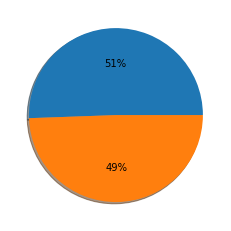

Model Accuracy:0.82
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       139
           1       0.84      0.79      0.81       136

    accuracy                           0.82       275
   macro avg       0.82      0.82      0.82       275
weighted avg       0.82      0.82      0.82       275



In [0]:
#combine all data sets
data = pd.DataFrame()
data = pd.concat([amazon, yelp, imdb])
data['index'] = data.index

data

#Total Count of Each Category
pd.set_option('display.width', 4000)
pd.set_option('display.max_rows', 1000)
distOfDetails = data.groupby(by='Class', as_index=False).agg({'index': pd.Series.nunique}).sort_values(by='index', ascending=False)
distOfDetails.columns =['Class', 'COUNT']
print(distOfDetails)
#Distribution of All Categories
plt.pie(distOfDetails['COUNT'],autopct='%1.0f%%',shadow=True, startangle=360)
plt.show()

#Text Preprocessing
columns = ['index','Class', 'Sentence']
df_ = pd.DataFrame(columns=columns)
#lower string
data['Sentence'] = data['Sentence'].str.lower()
#remove email adress
data['Sentence'] = data['Sentence'].replace('[a-zA-Z0-9-_.]+@[a-zA-Z0-9-_.]+', '', regex=True)
#remove IP address
data['Sentence'] = data['Sentence'].replace('((25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)(\.|$)){4}', '', regex=True)
#remove punctaitions and special chracters
data['Sentence'] = data['Sentence'].str.replace('[^\w\s]','')
#remove numbers
data['Sentence'] = data['Sentence'].replace('\d', '', regex=True)

#remove stop words
for index, row in data.iterrows():
    word_tokens = word_tokenize(row['Sentence'])
    filtered_sentence = [w for w in word_tokens if not w in stopwords.words('english')]
    df_ = df_.append({"index": row['index'], "Class":  row['Class'],"Sentence": " ".join(filtered_sentence[0:])}, ignore_index=True)
data = df_

X_train, X_test, y_train, y_test = train_test_split(data['Sentence'].values.astype('U'),data['Class'].values.astype('int32'), test_size=0.10, random_state=0)
classes  = data['Class'].unique()

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier

#grid search result
vectorizer = TfidfVectorizer(analyzer='word',ngram_range=(1,2), max_features=50000,max_df=0.5,use_idf=True, norm='l2') 
counts = vectorizer.fit_transform(X_train)
vocab = vectorizer.vocabulary_
classifier = SGDClassifier(alpha=1e-05,max_iter=50,penalty='elasticnet')
targets = y_train
classifier = classifier.fit(counts, targets)
example_counts = vectorizer.transform(X_test)
predictions = classifier.predict(example_counts)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

#Model Evaluation
acc = accuracy_score(y_test, predictions, normalize=True)
hit = precision_score(y_test, predictions, average=None,labels=classes)
capture = recall_score(y_test, predictions, average=None,labels=classes)
print('Model Accuracy:%.2f'%acc)
print(classification_report(y_test, predictions))